In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mp
import seaborn as sb

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

In [2]:

df = pd.read_csv('Iris.csv') 

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [305]:
class_name = df['Species'].unique()
class_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [253]:
df.corr()
#, cmap="YlGnBu", annot=True

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


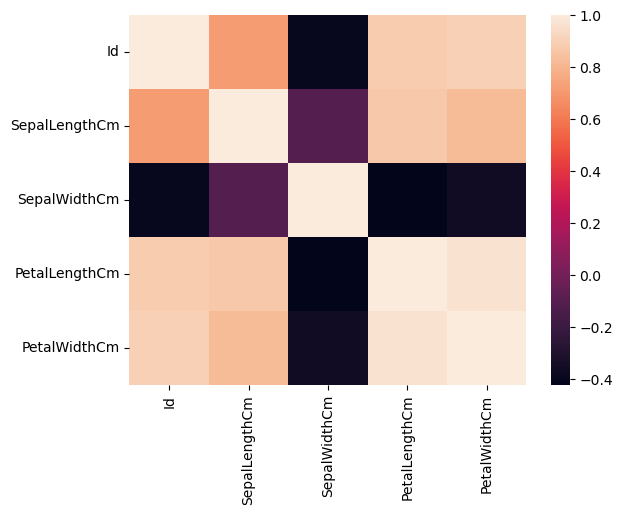

In [244]:
df = sb.heatmap(df.corr())

In [254]:
Y=df['Species']
X=df.drop(['Species','Id'],axis=1)

In [255]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [256]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [257]:
X, Y = shuffle(X, Y, random_state=145)

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [288]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

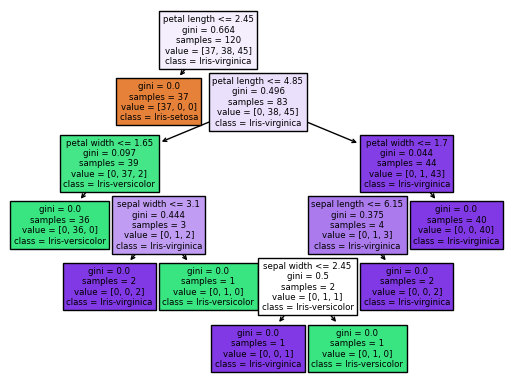

In [289]:
# Feature names corresponding to your dataset's columns
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
class_name = df['Species'].unique()
plt.figure()
plot_tree(decision_tree_classifier, filled=True, feature_names=feature_names, class_names=class_name)
plt.show()

In [290]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

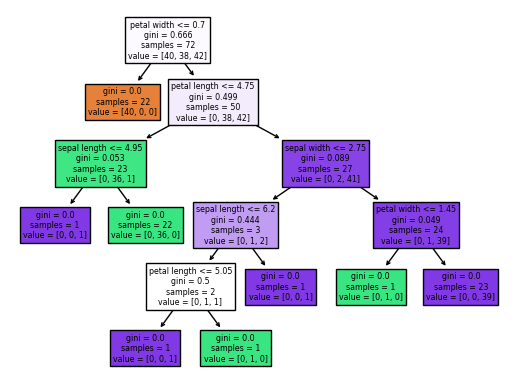

In [303]:
rf_tree = random_forest_classifier.estimators_[0] 
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
class_name = df['Species'].unique()
plt.figure()
plot_tree(rf_tree, filled=True,feature_names=feature_names, class_names=class_name)
plt.show()

In [294]:
decision_tree_predict = decision_tree_classifier.predict(X_test)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predict)

random_forest_predict = random_forest_classifier.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predict)

print(decision_tree_accuracy)
print(random_forest_accuracy)
diff = rf_accuracy - dt_accuracy
print(diff)

0.8666666666666667
0.9
0.033333333333333326


In [180]:
#this result was without dropping ID column
#print(f"Desion tree accuracy  {decision_tree_accuracy}")
#print(f"random forest Accuracy: {random_forest_accuracy}")
#print(f"Difference between Random Forest and decision tree= {diff:.2%}")

Desion tree accuracy  0.9666666666666667
random forest Accuracy: 1.0
Difference between Random Forest and decision tree= 3.33%


In [295]:
print(f"Desion tree accuracy  {decision_tree_accuracy}")
print(f"random forest Accuracy: {random_forest_accuracy}")
print(f"Difference between Random Forest and decision tree= {diff:.2%}")

Desion tree accuracy  0.8666666666666667
random forest Accuracy: 0.9
Difference between Random Forest and decision tree= 3.33%
